In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
!pip install tensorflow-gpu==2.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 56.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ten

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
image_paths = []
labels = []


In [12]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:
!pip install pandas

In [20]:
# Directory containing the uploaded images
image_dir = '/content/drive/My Drive/deep learning'

# Initialize lists to store image file paths and corresponding labels
image_paths = []
labels = []

for filename in os.listdir(image_dir):
    if filename.startswith("R") or filename.startswith("P"):
        image_paths.append(os.path.join(image_dir, filename))
        # Create labels based on the filenames (0 for R, 1 for P)
        if filename.startswith("R"):
            labels.append(0)
        elif filename.startswith("P"):
            labels.append(1)

# Create a DataFrame to store image paths and labels
df = pd.DataFrame({'Image_Path': image_paths, 'Label': labels})

# Define the paths for the CSV files
train_csv_path = '/content/drive/My Drive/Deep_Learning/train.csv'
test_csv_path = '/content/drive/My Drive/Deep_Learning/test.csv'

# Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the training and testing DataFrames as CSV files
train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print(f"CSV files saved:\n- Training CSV: {train_csv_path}\n- Testing CSV: {test_csv_path}")

CSV files saved:
- Training CSV: /content/drive/My Drive/Deep_Learning/train.csv
- Testing CSV: /content/drive/My Drive/Deep_Learning/test.csv


In [21]:
os.chdir("/content/drive/My Drive/Deep_Learning/")
os.getcwd()

'/content/drive/My Drive/Deep_Learning'

In [22]:
# Define image size
image_height, image_width = 80, 80

# Define the paths for the CSV files (change these paths as needed)
train_csv_path = '/content/drive/My Drive/Deep_Learning/train.csv'
test_csv_path = '/content/drive/My Drive/Deep_Learning/test.csv'

# Load the CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)


In [23]:
# Load and preprocess the images
def preprocess_images(image_paths, target_size=(image_height, image_width)):
    images = []
    for image_path in image_paths:
        img = load_img(image_path, target_size=target_size)
        img = img_to_array(img) / 255.0
        images.append(img)
    return np.array(images)



In [26]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img

In [29]:
from keras.preprocessing.image import img_to_array

In [53]:
X_train = preprocess_images(train_df['Image_Path'].values, target_size=(80, 80))
X_test = preprocess_images(test_df['Image_Path'].values, target_size=(80, 80))

# Convert labels to binary format (0 or 1)
Y_train = train_df['Label'].values
Y_test = test_df['Label'].values


In [54]:
print("Shape of X_train before reshape: ", X_train.shape)

Shape of X_train before reshape:  (80, 80, 80, 3)


In [55]:
total_elements = X_train.size
print("Total elements in X_train: ", total_elements)

Total elements in X_train:  1536000


In [56]:
expected_shape = (len(X_train), 80, 80, 3)
expected_elements = 1 * 80 * 80 * 3
print("Expected elements after reshape: ", expected_elements)

Expected elements after reshape:  19200


In [57]:
if total_elements != expected_elements:
    print("Reshaping is not possible due to incompatible dimensions.")
else:
    # Reshape the array as intended
    X_train = X_train.reshape(len(X_train), 80, 80, 3)

Reshaping is not possible due to incompatible dimensions.


In [58]:
print("Shape of X_train after reshape: ", X_train.shape)

Shape of X_train after reshape:  (80, 80, 80, 3)


In [59]:
X_train = X_train.reshape(len(X_train),80, 80, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test),80,80, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (80, 80, 80, 3)
Shape of Y_train:  (80, 1)
Shape of X_test:  (20, 80, 80, 3)
Shape of Y_test:  (20, 1)


In [60]:
# Create a CNN model for binary classification
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification



In [62]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [63]:
model.fit(X_train, Y_train, epochs = 40, batch_size = 64)

Epoch 1/40
2/2 [==============================] - 1s 131ms/step - loss: 0.1862 - accuracy: 0.6625
Epoch 2/40
2/2 [==============================] - 0s 107ms/step - loss: 2.6148e-07 - accuracy: 1.0000
Epoch 3/40
2/2 [==============================] - 0s 107ms/step - loss: 1.8652e-10 - accuracy: 1.0000
Epoch 4/40
2/2 [==============================] - 0s 146ms/step - loss: 1.0772e-11 - accuracy: 1.0000
Epoch 5/40
2/2 [==============================] - 0s 104ms/step - loss: 1.7803e-12 - accuracy: 1.0000
Epoch 6/40
2/2 [==============================] - 0s 104ms/step - loss: 7.6694e-13 - accuracy: 1.0000
Epoch 7/40
2/2 [==============================] - 1s 190ms/step - loss: 2.7391e-13 - accuracy: 1.0000
Epoch 8/40
2/2 [==============================] - 1s 176ms/step - loss: 1.1404e-13 - accuracy: 1.0000
Epoch 9/40
2/2 [==============================] - 1s 173ms/step - loss: 5.7065e-14 - accuracy: 1.0000
Epoch 10/40
2/2 [==============================] - 1s 186ms/step - loss: 3.3484e-14 - 

In [64]:
accuracy = model.evaluate(X_test, Y_test)[1]
print(f"Test accuracy: {accuracy}")


1/1 [==============================] - 0s 205ms/step - loss: 4.4409e-15 - accuracy: 1.0000
Test accuracy: 1.0


In [65]:
model.save('/content/drive/My Drive/Deep_Learning/trained_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import load_model

In [69]:
model = load_model('/content/drive/My Drive/Deep_Learning/trained_model.h5')


In [70]:
# Use the model to predict labels for the test images
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert softmax outputs to class labels

1/1 [==============================] - 0s 207ms/step


In [72]:
output_df = pd.DataFrame({'Image_Path': test_df['Image_Path'], 'Predicted_Label': predicted_labels})

In [73]:
# Save the output DataFrame as a CSV file (you can change the output path)
output_csv_path = '/content/drive/My Drive/Deep_Learning/predicted_labels.csv'
output_df.to_csv(output_csv_path, index=False)

print(f"Predicted labels saved to: {output_csv_path}")


Predicted labels saved to: /content/drive/My Drive/Deep_Learning/predicted_labels.csv


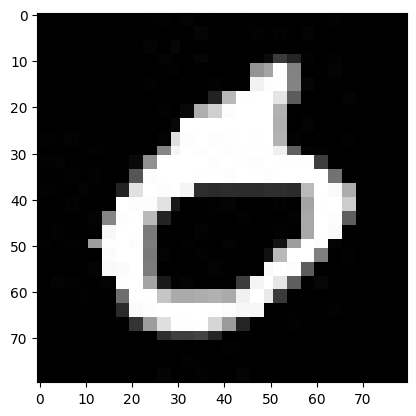

In [74]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()


In [75]:
model.evaluate(X_test, Y_test)


1/1 [==============================] - 0s 174ms/step - loss: 4.4409e-15 - accuracy: 1.0000


[4.440892098500626e-15, 1.0]

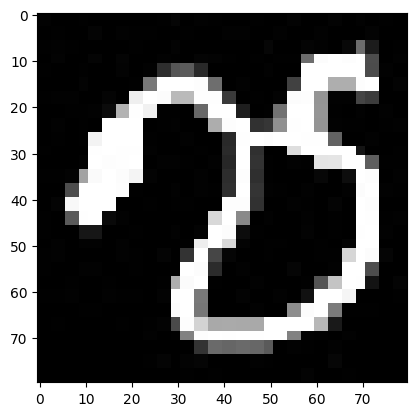

1/1 [==============================] - 0s 27ms/step
Our model says it is: ප
1/1 [==============================] - 0s 53ms/step - loss: 4.4409e-15 - accuracy: 1.0000
Test accuracy: 1.0


In [82]:
# Choose a random index from the test set
idx2 = random.randint(0, len(Y_test))

# Display the image
plt.imshow(X_test[idx2, :])
plt.show()

# Predict using the model for the selected image
y_pred = model.predict(X_test[idx2, :].reshape(1, 80, 80, 3))

# Check the prediction and print the result
if np.all(y_pred < 0.5):
    pred = 'ර'
else:
    pred = 'ප'

print("Our model says it is:", pred)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test)

# Print the test accuracy
print(f"Test accuracy: {accuracy}")

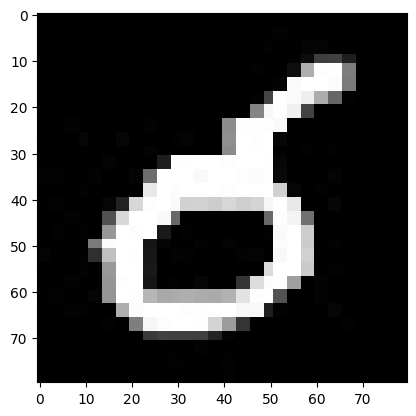

1/1 [==============================] - 0s 25ms/step
Our model says it is: ර
1/1 [==============================] - 0s 47ms/step - loss: 4.4409e-15 - accuracy: 1.0000
Test accuracy: 1.0


In [80]:
# Choose a random index from the test set
idx2 = random.randint(0, len(Y_test))

# Display the image
plt.imshow(X_test[idx2, :])
plt.show()

# Predict using the model for the selected image
y_pred = model.predict(X_test[idx2, :].reshape(1, 80, 80, 3))

# Check the prediction and print the result
if np.all(y_pred < 0.5):
    pred = 'ර'
else:
    pred = 'ප'

print("Our model says it is:", pred)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test)

# Print the test accuracy
print(f"Test accuracy: {accuracy}")